In [1]:
import csv
import matplotlib.pyplot as plt

In [2]:
with open("軸比 Plot.csv", "r") as file:
    ar = list(csv.reader(file))

In [3]:
(ar[0][1])

"dB(AxialRatioValue) [] - $Dk='1' Freq='28GHz' Phi='0deg'"

In [4]:
Dk = []
arzero = []
for i in range((500)):
    ele = []
    Dk.append(float(ar[0][2*i+1].split("Dk='")[1].split("'")[0]))
    for j in range(360):
        ele.append(float(ar[j+1][2*i+1]))
    arzero.append(ele)

In [5]:
arzero[0]

[0.405882138378884,
 0.413835657989927,
 0.414377051907382,
 0.41424946709603,
 0.427090482290781,
 0.472178483911397,
 0.567158742059717,
 0.721083498832673,
 0.936668635423841,
 1.21628296848281,
 1.56518796704723,
 1.99270153439414,
 2.51316294763196,
 3.14766669809568,
 3.92732745231823,
 4.89945919627133,
 6.13995755123422,
 7.78084909786123,
 10.0824141504618,
 13.6799244062529,
 21.0567026125057,
 27.3265148106296,
 14.5299643634485,
 9.29422005345164,
 6.05210254802195,
 4.1688280279374,
 3.8451858444856,
 4.80635645043506,
 6.29432753616802,
 7.93999272204488,
 9.63658423102385,
 11.3614741238759,
 13.1192675589077,
 14.9252996489997,
 16.8008123214995,
 18.771872238757,
 20.869505112014,
 23.1296621367951,
 25.5908110695082,
 28.2831414157626,
 31.1918704072468,
 34.1490963789775,
 36.5913460018548,
 37.4035872971609,
 35.782939715784,
 32.3706564157774,
 28.3097289800003,
 24.2276920052911,
 20.3273675372667,
 16.648988698352,
 13.1996530242958,
 10.0076445104735,
 7.1632038

In [6]:
arzeroLocalMax = []
for zero in arzero:
    former = zero[0]
    localMax = dict()
    localls = []
    deg = []
    for i in range(1, len(zero)-1):
        if (former < zero[i]) and (zero[i] > zero[i+1]):
            localMax[zero[i]] = i-180
            localls.append(zero[i])
            deg.append(i)
        former = zero[i]
    arzeroLocalMax.append((localMax, localls, deg))

In [7]:
arzeroLocalMin = []
for zero in arzero:
    former = zero[0]
    localMin = dict()
    localls = []
    deg = []
    for i in range(1, len(zero)-1):
        if (former > zero[i]) and (zero[i] < zero[i+1]):
            localMin[zero[i]] = i-180
            localls.append(zero[i])
            deg.append(i)
        former = zero[i]
    arzeroLocalMin.append((localMin, localls, deg))

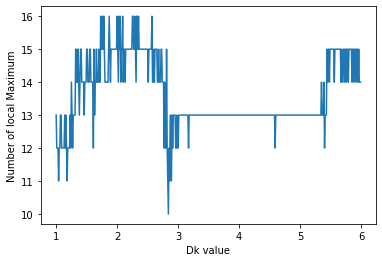

In [8]:
localMaxNum = []
for ele in arzeroLocalMax:
    localMaxNum.append(len(ele[0]))
plt.plot(Dk, localMaxNum)
plt.xlabel('Dk value')
plt.ylabel('Number of local Maximum')
plt.show()  

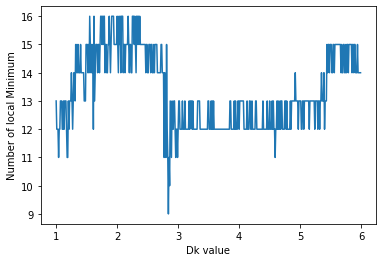

In [11]:
localMinNum = []
for ele in arzeroLocalMin:
    localMinNum.append(len(ele[0]))
plt.plot(Dk, localMinNum)
plt.xlabel('Dk value')
plt.ylabel('Number of local Minimum')
plt.show()  

In [12]:
def intersectx(x1, y1, x2, y2, targety):
    return x1 + (x2 - x1)/ (y2 - y1) * (targety -y1)

def intersecty(x1, y1, x2, y2, targetx):
    return y1 + (y2 - y1)/ (x2 - x1) * (targetx - x1)

In [ ]:
 def lhzeromainLobe(self):
        allDk = self.lhzeroLocalMax
        out = []
        for i in range(len(allDk)):
            localMax, localls, deg = allDk[i][0], allDk[i][1], allDk[i][2]
            lhzero = self.lhzero[i]
            globalMax = max(localMax.keys())
            k = deg[localls.index(globalMax)]
            '''
            sx1 = np.linspace(150,210,4000000)
            func1 = interpolate.UnivariateSpline(list(range(267)), lhzero, s = 0)
            sy1 = func1(sx1)
            '''
            m = k
            # 低點
            while lhzero[k] > globalMax-3 :
                k -= 1
            LF = intersectx(k-180, lhzero[k], k-179, lhzero[k+1], globalMax-3)
            # 高點
            while lhzero[m] > globalMax -3 :
                m += 1
            HF = intersectx(m-180, lhzero[m], m-181, lhzero[m-1], globalMax-3)
            BW = HF - LF
            out.append((globalMax, LF, HF, BW))

In [28]:
out = []
for i in range(len(arzeroLocalMin)):
    localMin, localls, deg = arzeroLocalMin[i][0], arzeroLocalMin[i][1], arzeroLocalMin[i][2]
    zero = arzero[i]
    #globalMin = min(localMin.keys())
    globalMin = zero[180]
    #print(localMin)
    #print(localls)
    #print(deg)
    #print(globalMin)
    #k = deg[localls.index(globalMin)]
    k = 180
    m = k
     # 低點
    #print(m)
    while zero[k] < globalMin +3 :
        #print(zero[k])
        k -= 1
    LF = intersectx(k-180, zero[k], k-179, zero[k+1], globalMin+3)
    # 高點
    while zero[m] < globalMin +3 :
        m += 1
    HF = intersectx(m-180, zero[m], m-181, zero[m-1], globalMin+3)
    BW = HF - LF
    out.append((globalMin, LF, HF, BW))
    
#值得發現的有趣性質 : 中央點的軸比並不是0，而且對有些地方而言並不是最小值

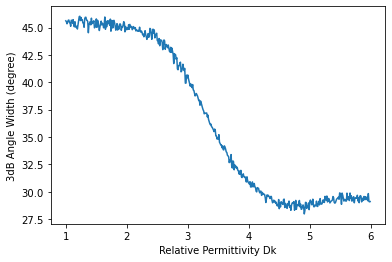

In [29]:
B = []
x = out
for i in range(500):
    B.append(x[i][3])

plt.plot(Dk, B)
plt.xlabel("Relative Permittivity Dk")
plt.ylabel("3dB Angle Width (degree)")
plt.show()

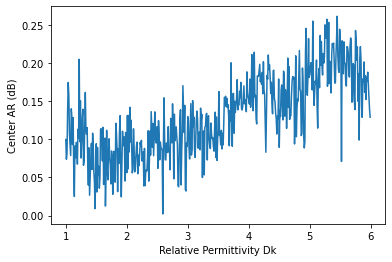

In [30]:
A = []
x = out
for i in range(500):
    A.append(x[i][0])

plt.plot(Dk, A)
plt.xlabel("Relative Permittivity Dk")
plt.ylabel("Center AR (dB)")
plt.show()